## Exploratory Data Analysis

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

### Load Data

In [2]:
train_clean = pd.read_csv('../data/train_clean.csv',na_values='', keep_default_na=False, index_col='id')

In [3]:
train_clean.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,mo_sold,yr_sold,sale_type,saleprice
id,,,,,,,,,,,,,,,,,,,,,
109,60,RL,69.0552,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,...,0,0,0,NA,NA,NA,3,2010,WD,130500
544,60,RL,43.0000,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,...,0,0,0,NA,NA,NA,4,2009,WD,220000
153,20,RL,68.0000,7922,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,0,NA,NA,NA,1,2010,WD,109000
318,60,RL,73.0000,9802,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,0,NA,NA,NA,4,2010,WD,174000
255,50,RL,82.0000,14235,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,0,NA,NA,NA,3,2010,WD,138500


### Confirming No Null Values

In [4]:
train_clean.isnull().sum().sum()

0

### Data Visualization

We'll use some data visualization to better understand our data in a few ways:
1. Identify features that are most correlated with saleprice
1. Understand the dsitributions of our numeric features
1. Use bar charts to look at frequenct counts for all categorical features
1. Observe potential outliers across features

We can start be seeing which numeric features are most correlated with the sale price, by calculating the pearson correlation coefficient

First we'll look at the distribution of the sale prices

In [ ]:
# Create a figure.
plt.figure(figsize=(12,6))

plt.hist(train_clean['saleprice'], color='blue',bins=30)
plt.title('Median Sales Price is $163K', fontsize=30)
plt.xlabel('Sales Price $', fontsize=20)
plt.ylabel('Count of Homes', fontsize=20)
plt.axvline(x=train_clean['saleprice'].mean(),c='darkgrey', linewidth=4, linestyle='--')
# plt.axvline(x=train_clean['saleprice'].median(),c='orange')
;
# Saving the image
# plt.savefig('../images/saleprice_hist.png');

We can see that the distribution is right skewed, with several unusually high home values

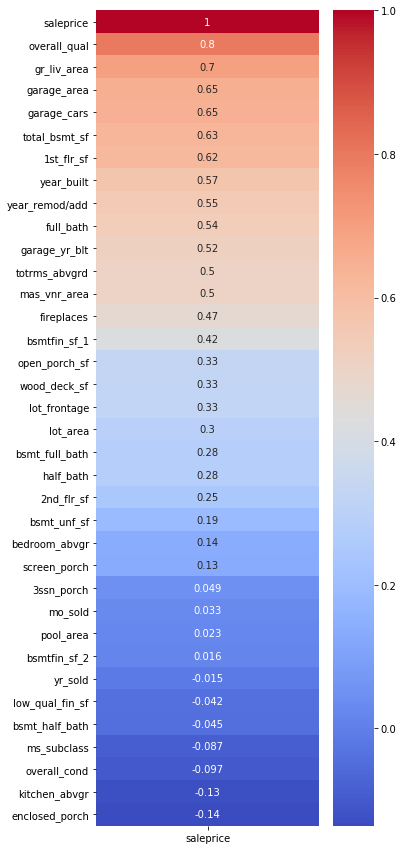

In [5]:
plt.figure(figsize=(5,15))
sns.heatmap(train_clean.corr()[['saleprice']].sort_values('saleprice',ascending=False)
            ,annot=True
            ,cmap = 'coolwarm'
           );

There are 6 features with a correlation coefficient of 0.6 or greater. The 'overall_qual' had the highest correlation of 0.8. The snext highest were the above ground sqft (gr_liv_area - 0.7) and the garage area (0.65). 
Many of the most positively correlated features relate to the size/square footage of the home which makes sense.

Features that have a positive correlation that are surprisingly not as strong include the lot area (0.3) and the number of above ground bedrooms (bedroom_abvgr - 0.14).

We also observe that no numeric features have a strong negative correlation with sale price. The features that are most correlated have a positive relationship with price

### Scatterplots: Numeric Features vs Saleprice

The below function will allow us to create scatterplots for multiple features at once. We'll look ta the relationship between these features and the sale price

In [24]:
# Code adapted by Douglas Strodtman and Daniel Kim

def subplot_scatter(dataframe, list_of_columns, y_val, figsize_height = 80):
        nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
        fig, ax = plt.subplots(figsize=(20,figsize_height),nrows=nrows, ncols=2) # You'll want to specify your figsize
        ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
        for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
            ax[i].scatter(dataframe[column],dataframe[y_val],color= 'blue' )
            ax[i].set_title(f'{list_of_columns[i]} vs. {y_val}', fontsize = 23)
            ax[i].set_ylabel(y_val, fontsize = 18)
            ax[i].set_xlabel(list_of_columns[i], fontsize = 18)
            ax[i].tick_params(axis='x',labelsize=18)
            ax[i].tick_params(axis='y',labelsize=18)

In [12]:
train_clean.select_dtypes('float64').shape

(2051, 11)

As we have 11 float features in the dataset, we can first create scatterplots of the feature and the saleprice

Below is the list of features

In [13]:
train_clean.select_dtypes('float64').columns

Index(['lot_frontage', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath',
       'garage_yr_blt', 'garage_cars', 'garage_area'],
      dtype='object')

In [14]:
cols_continuous = train_clean.select_dtypes('float64').columns

Running our function to create the scatterplots:

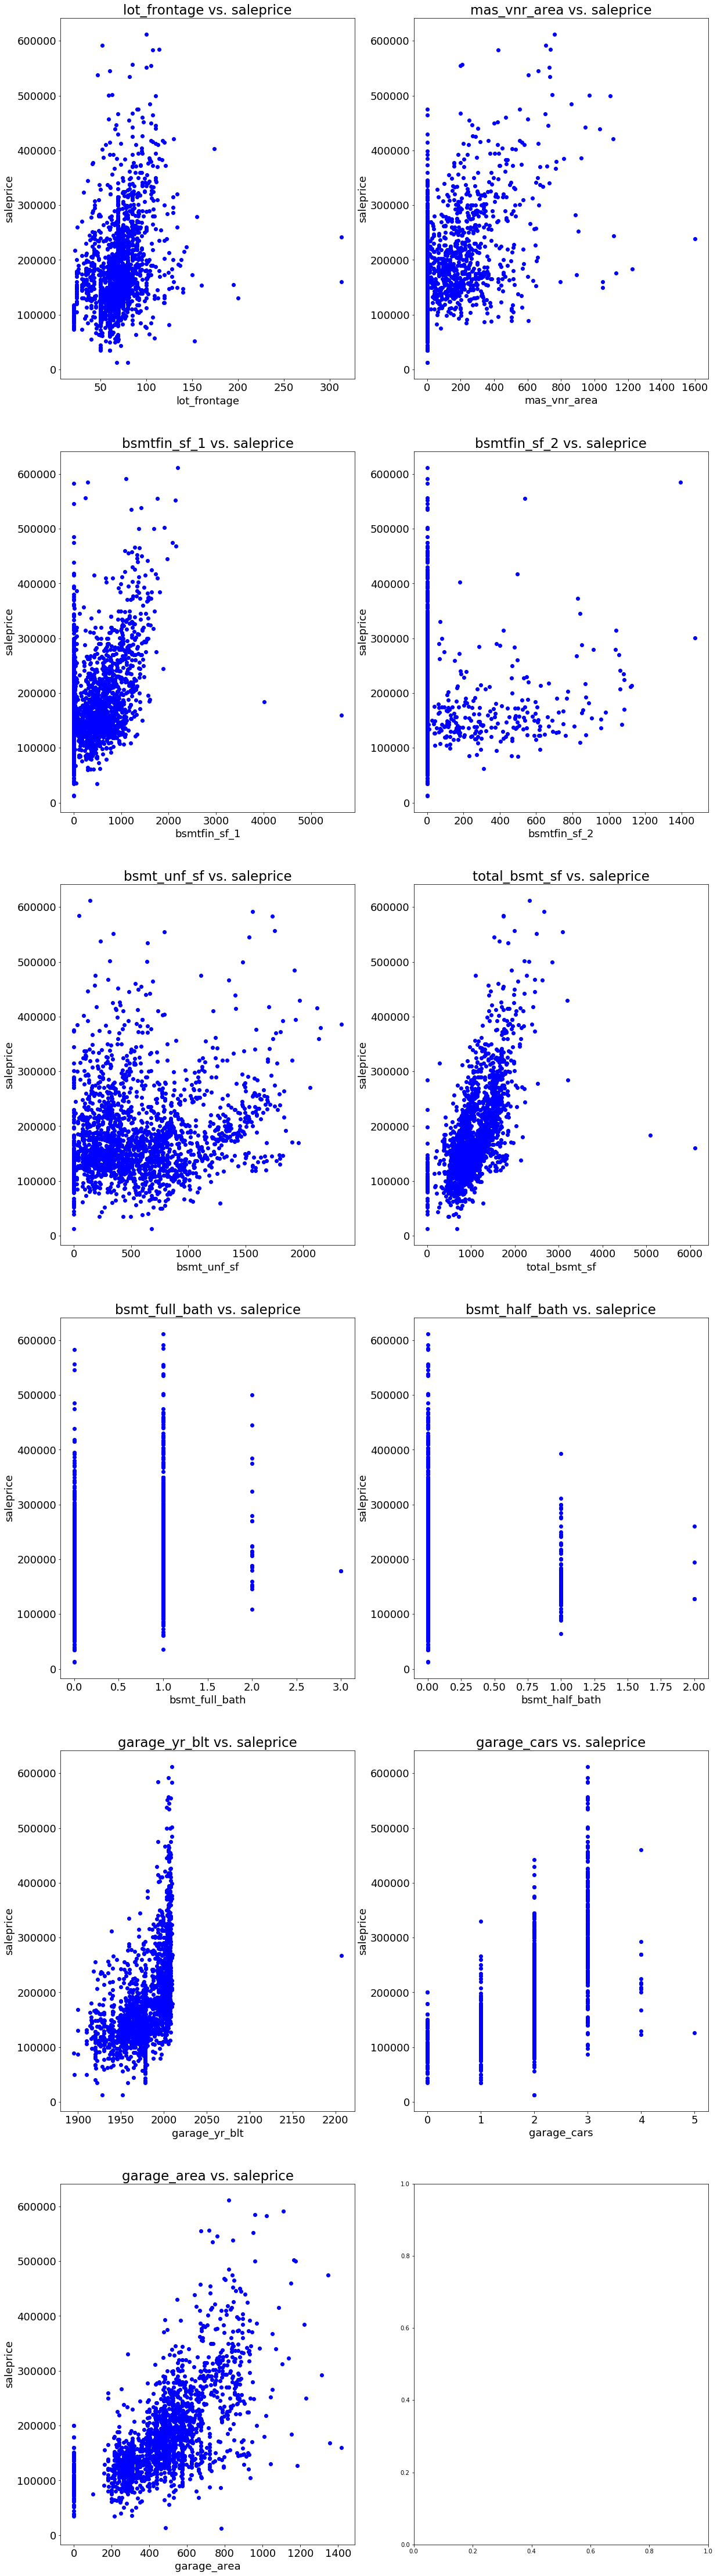

In [15]:
subplot_scatter(train_clean,cols_continuous,'saleprice')

Several plots confirm the strong positive correlation coefficient observed from the heatmap (including 'garage_area' and 'total_bsmt_sf'.

Two features that stand out include 'bsmt_full_bath' and 'bsmtfin_sf_2', we can examine below:

In [16]:
feat_floats = ['bsmt_full_bath','bsmtfin_sf_2']

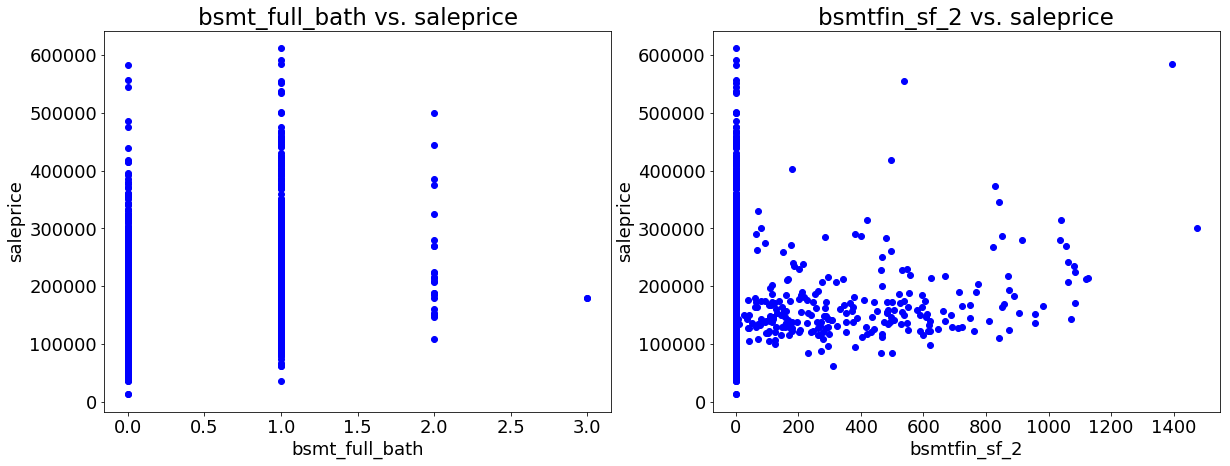

In [26]:
subplot_scatter(train_clean,feat_floats,'saleprice',figsize_height=7)

Interestingly we don't see a strong correlation between the number of bathrooms in the basement and the salesprice.

Also, the the square footage of the second basement surprisingly is not strongly correlated with price. One would assume having a second basement would improve the value of the home

We'll now examine some of our integer features

In [27]:
train_clean.select_dtypes('int64').columns

Index(['ms_subclass', 'lot_area', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'wood_deck_sf',
       'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
       'pool_area', 'mo_sold', 'yr_sold', 'saleprice'],
      dtype='object')

In [28]:
cols_int = ['lot_area', 'overall_qual', 'overall_cond',
       'year_built', 'year_remod/add', '1st_flr_sf', '2nd_flr_sf',
       'low_qual_fin_sf', 'gr_liv_area', 'full_bath', 'half_bath',
       'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces',
       'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch',
       'screen_porch', 'pool_area', 'mo_sold', 'yr_sold']

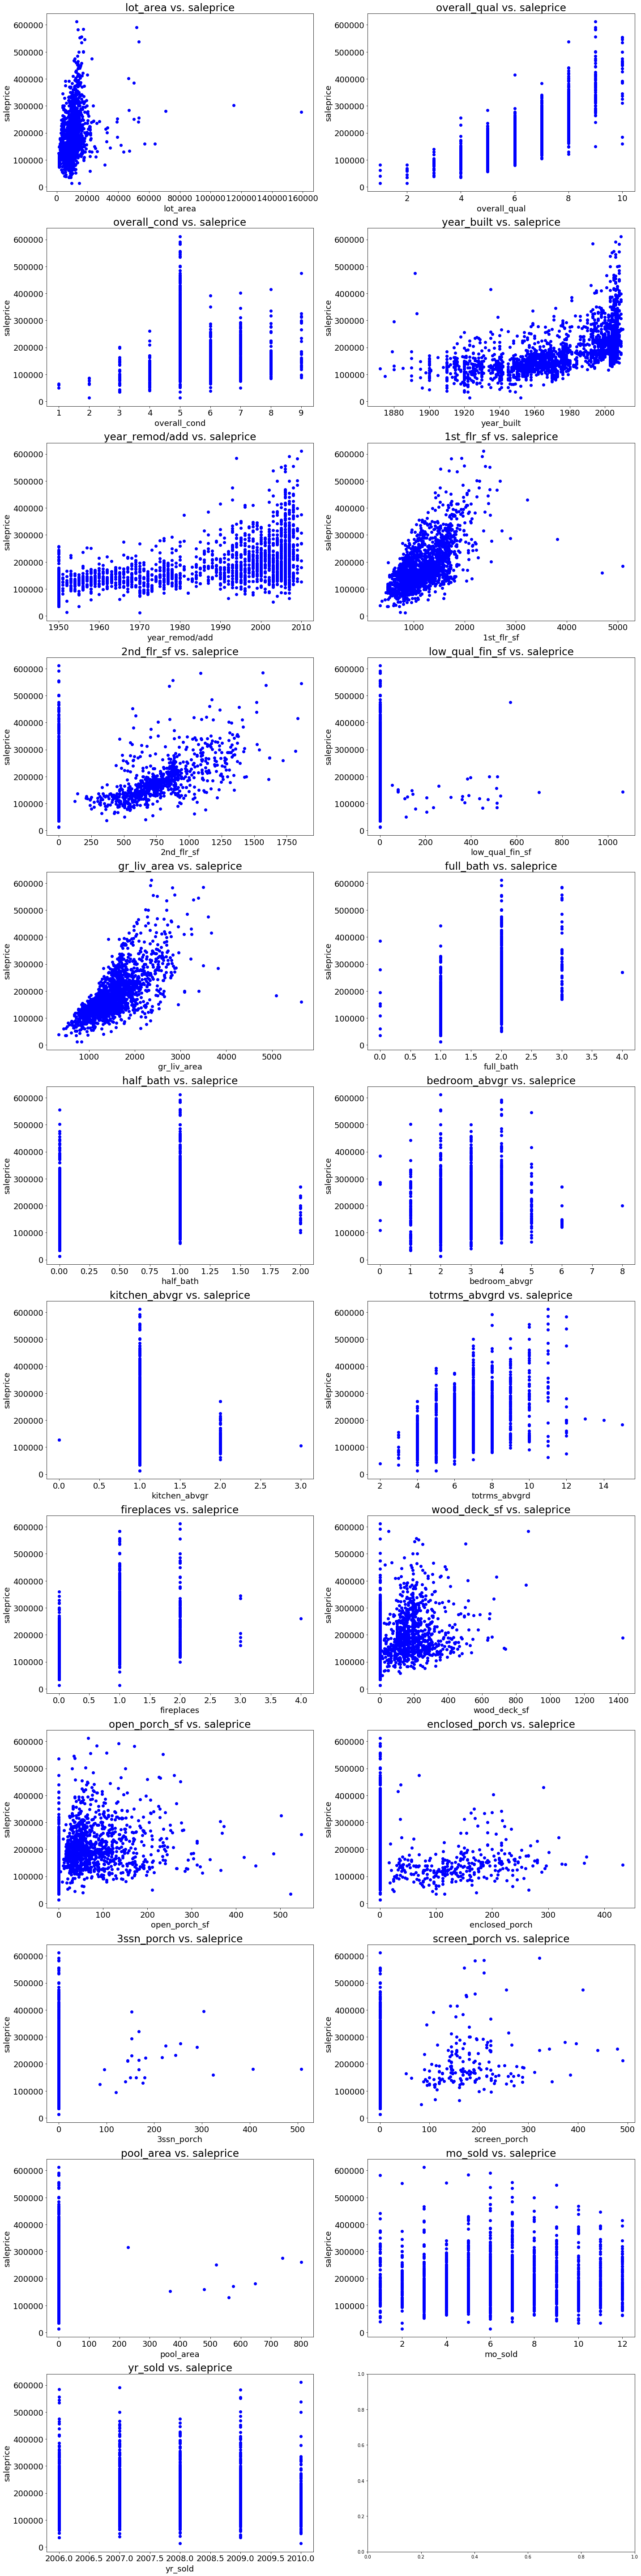

In [29]:
subplot_scatter(train_clean,cols_int,'saleprice')
plt.tight_layout();

We'll examine a subset of these fields further, namely the 'lot_area', '2nd_flr_sf', and 'full_bath'

In [31]:
feat_int_discovery = ['lot_area', '2nd_flr_sf', 'full_bath']

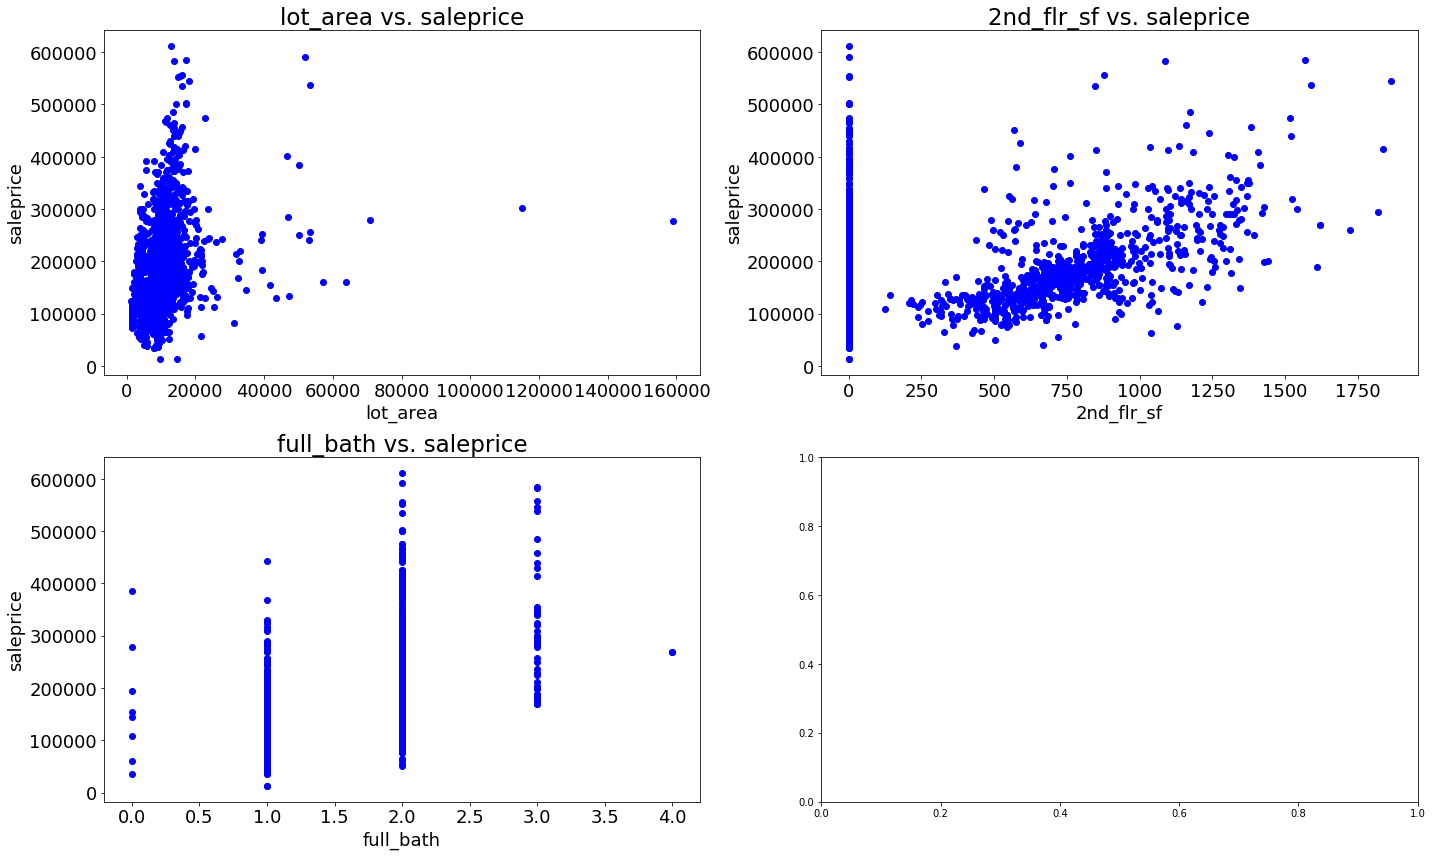

In [34]:
subplot_scatter(train_clean,feat_int_discovery,'saleprice',figsize_height=12)
plt.tight_layout();

First we can see that the 'lot_area' has several outliers. We can confirm this with the summary stats

In [36]:
train_clean.lot_area.describe().T

count      2051.000000
mean      10065.208191
std        6742.488909
min        1300.000000
25%        7500.000000
50%        9430.000000
75%       11513.500000
max      159000.000000
Name: lot_area, dtype: float64

We see that 75% of obs have a lot area below 11.5K, while the max is 159K. We also see that the saleprice for some of these larger observations is not very large

We may need to impute these values later if it negatively impacts our model

Next we examine the '2nd_flr_sf' which had a 0.25 correlation coefficient with sale price. When we observe the scatter we see that for homes that do have a second floor (non zero observation) the correlation with price looks much stronger. It may make sense to bin this field, including a discrete value for 0, <500, <1000, etc.

'full_bath' is interesting because we can see several 2 bedroom homes with sales prices on par with 3 bedroom homes.

In [39]:
train_clean.groupby(by='full_bath')['saleprice'].median().sort_values()

full_bath
1    131700.0
0    149168.5
2    196000.0
4    269500.0
3    284700.0
Name: saleprice, dtype: float64

Here we see that the median price of a 3 bedroom home is almost $100K more than that of a 2 bedroom home.

We also see the median price of a 4 bdrm home is lower than that of 3 bedroom homes, which is surprising. We can confirm the counts below:

In [41]:
train_clean['full_bath'].value_counts()

2    1096
1     900
3      45
0       8
4       2
Name: full_bath, dtype: int64

indeed we only see 2 homes that have 4 bedrooms. The 8 homes with zero bedrooms is also interesting. These could be studios perhaps.

### Exploring Categorical Data with Bar Charts

Next we'll examine our categorical features by creating some bar charts to show the frequency of occurrences. Specifically, we want to make note of any severe class imbalances within features

In the below function we'll pass a dataframe and a list of columns as arguments which will create a bar graph of frequency counts for each feature in the list.

In [51]:
# Code adapted by Douglas Strodtman and Daniel Kim

def subplot_bar(dataframe, list_of_columns, y_val=None, figsize_height = 180):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(figsize=(20,figsize_height),nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].barh(list(dataframe[column].value_counts().index),dataframe[column].value_counts(), color='blue')
        ax[i].set_title(f'{list_of_columns[i]} Frequency', fontsize = 23)
#         ax[i].set_xlabel(y_val, fontsize = 18)
        ax[i].set_ylabel(list_of_columns[i], fontsize = 18)
        ax[i].tick_params(axis='x',labelsize=18)
        ax[i].tick_params(axis='y',labelsize=18)

We can check to see how many object features we have in the data set

In [52]:
train_clean.select_dtypes('object').columns

Index(['ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour',
       'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc',
       'central_air', 'electrical', 'kitchen_qual', 'functional',
       'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual',
       'garage_cond', 'paved_drive', 'pool_qc', 'fence', 'misc_feature',
       'sale_type'],
      dtype='object')

We'll assign these features to a list

In [53]:
cols_object = train_clean.select_dtypes('object').columns

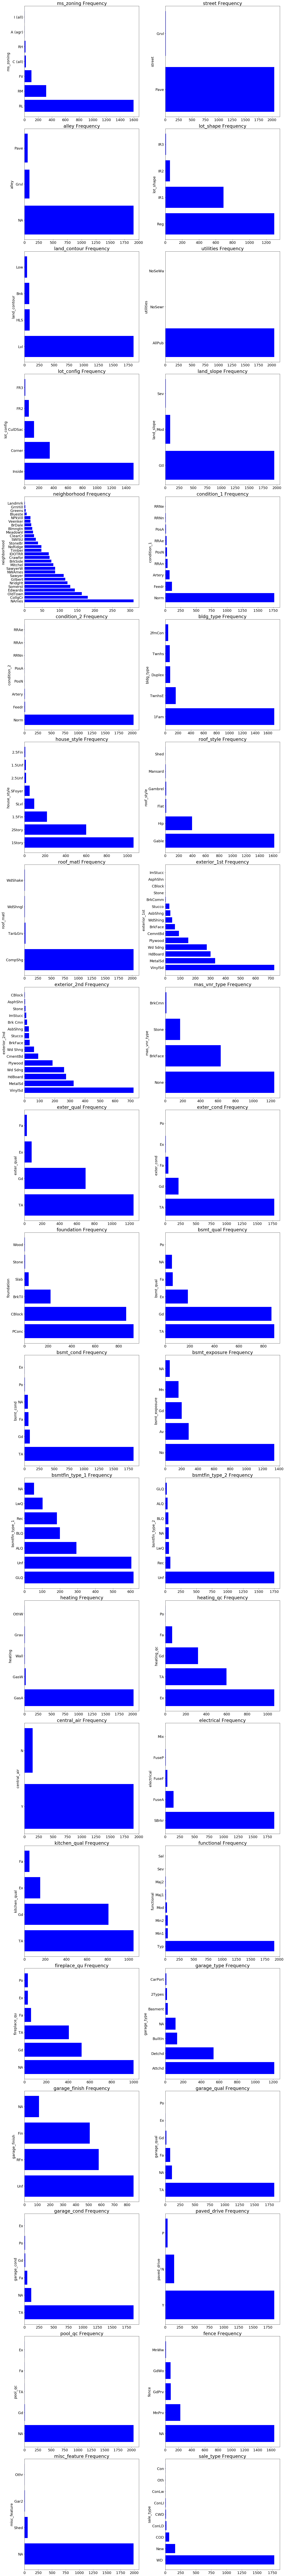

In [58]:
subplot_bar(train_clean, cols_object)
plt.tight_layout();

We'll examine a few of interest in more detail below:

In [62]:
feat_categorical_discovery = ['street','utilities','heating', 'condition_2', 'roof_matl']

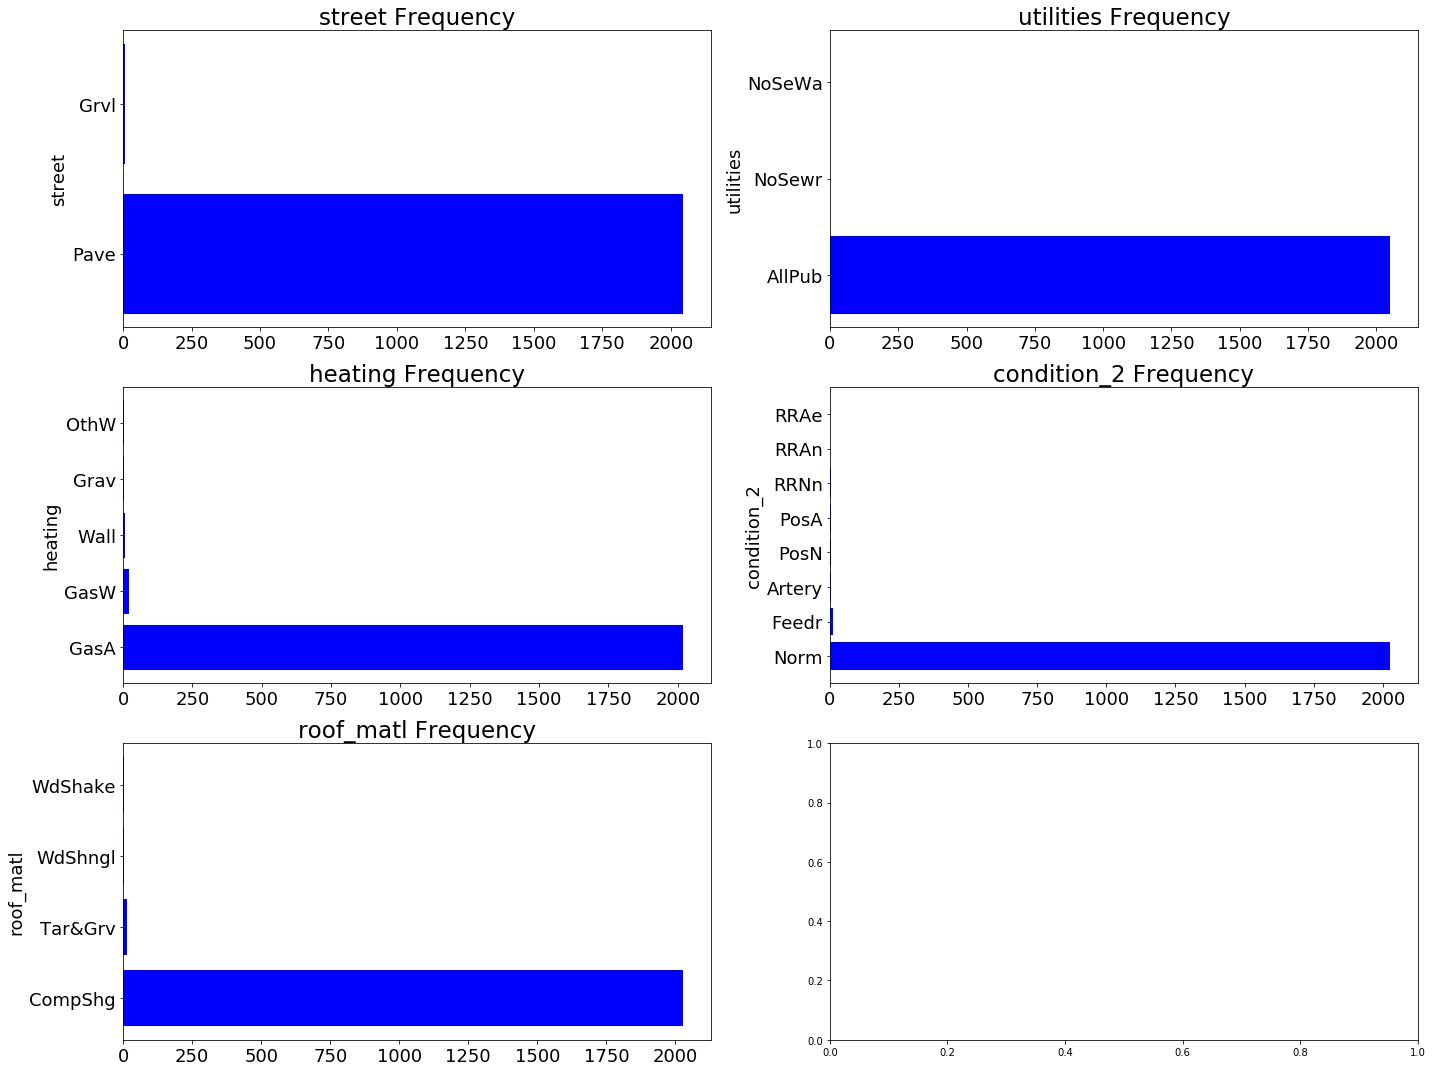

In [63]:
subplot_bar(train_clean, feat_categorical_discovery, figsize_height=15)
plt.tight_layout();

We can see that the above features have severe class imbalances. We'll keep these in mind as we proceed with the modeling process.

We can also look at the avg. sales price for each of these categorical features we identified above. We're looking for values that have low occurrences but higher/lower avg sales price. This could introduce noise into our model.

The below function will plot the avg. sales price for all the discrete values for each feature.

In [68]:
def subplot_bar_saleprice(dataframe, list_of_columns, y_val=None, figsize_height = 20):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(figsize=(10,figsize_height),nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].barh(list(dataframe[column].unique()),dataframe.groupby(by=column)['saleprice'].mean().sort_values(), color='blue')
        ax[i].set_title(f'{list_of_columns[i]} vs Avg. Sale Price', fontsize = 10)
#         ax[i].set_xlabel(list_of_columns[i], fontsize = 10)
        ax[i].set_ylabel('Avg. Sale Price', fontsize = 10)
#         ax[i].tick_params(axis='x',labelsize=18)
#         ax[i].tick_params(axis='y',labelsize=18)

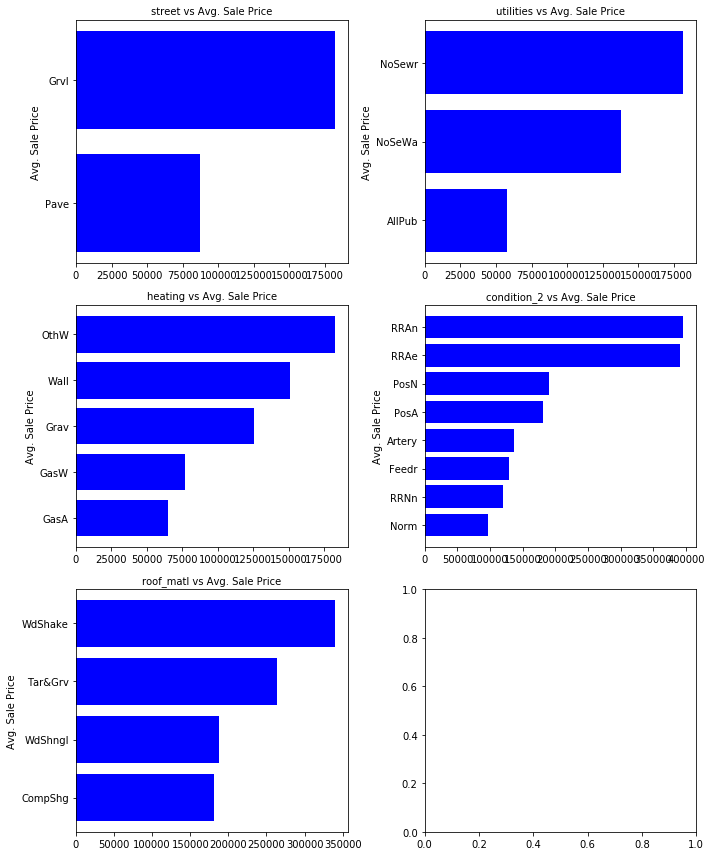

In [69]:
subplot_bar_saleprice(train_clean,feat_categorical_discovery, figsize_height = 12)
plt.tight_layout();

We indeed do some potential causes for concern. For example, in the 'heating' feature we saw that mostly all properties have 'GasA' and the avg. sale price for properties with 'GasA' is much lower than some other values like 'OthW' which had much lower counts.

## Assessing Correlated Features

Next examine if any numeric features are correlated with one another by utilizing a heatmap.

A heatmap is the visual representation of a correlation matrix. A correltation matrix displays the strength and direction of the linear relationship between features. This is quantified through the pearson correlation coefficient.

Below we'll define a function that will allow us to dynamically create a list of columns to use as a mask for the dataframe (see doc string below):

In [4]:
def mask_data_subset(df,*args):
    """Function allows you to pass a data frame, and a number of optional arugments (namely strings) 
    and returns a deduped list of columns that contain those strings. This list can then be used as a
    mask to subset a dataframe
    Ex: mask_dataset_subset(df,'2018',part) would return a list of columns from df that contain the 
    text '2018' and 'part'
    """
    subset_fields = []                                  
    list_strings = list(args)                           
    for col_name in df.columns:                         
        for string in list_strings:                     
            if string in col_name:
                if col_name in subset_fields:
                    None
                else: subset_fields.append(col_name)          
    return subset_fields

As many of our numeric features relate to the square footage or area of various aspects of the home, we can inspect if any of these features are correlated with one another

When we introduce features that are highly correlated in our linear model it can make the interpretation of individual predictor weights unreliable and unstable

In [12]:
mask_sf = mask_data_subset(train_clean,'_sf','area')

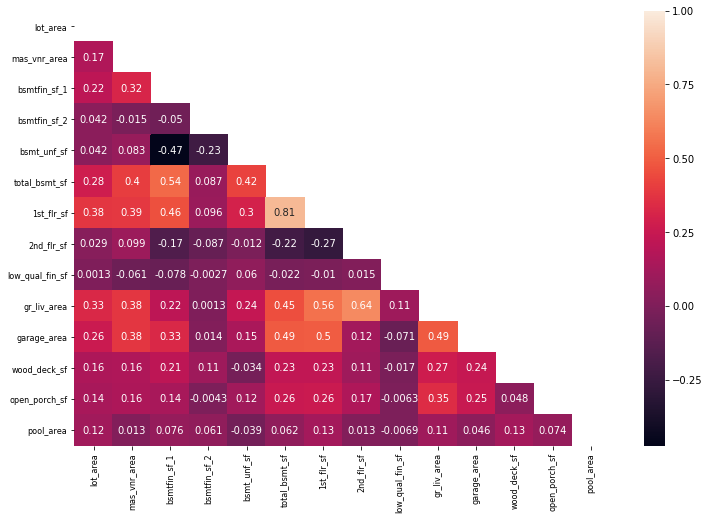

In [13]:
# Generate a heatmap in seaborn.
# This code is pulled from https://seaborn.pydata.org/generated/seaborn.heatmap.html.

# Set the default matplotlib figure size to 12x12:
fix, ax = plt.subplots(figsize=(12,8))

# Generate a mask for the upper triangle.
mask = np.zeros_like(train_clean[mask_sf].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(train_clean[mask_sf].corr(), mask=mask, ax=ax,annot=True)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=8)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=8);

Here we're looking for features that have significant positive correlation (0.5-1.0) or significant negative correlation (-1.0 - -0.5).

Some findings to note include:
- 'total_bsmt_sf' and 'bsmtfin_sf_1' have a moderately positive correlation of 0.54. 
- the highest correlation is between '1st_flr_sf' and 'total_bsmt_sf at 0.81.
- the 'gr_liv'area' (the above ground living area) is correlated with both the 1st and 2nd floor sqft (0.56 and 0.64, respectively).

As we evaluate different models, particularly OLS regression, we'll want to keep these attributes in mind as we interpret the coefficients